 ## <a id='0'> **1. ANÁLISIS EXPLORATORIO DE DATOS (EDA) - NFL** </a>
##### *THE BRIDGE - DATA_SCIENCE 2023*
 <a id='0'> ![Cover](/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/img/Eda_cover.png)</h1>

## <a id='1'> *ÍNDICE:* </a>
---
- [1. Introducción:](#3)
    - [1.1. Hipótesis](#11)
    - [1.2. Limpieza de datos](#)
        - [1.2.1 ](#)
        - [1.2.3 Visualización](#)
- [2. Conclusiones](#4)

----
## Contacto: 
- Aquí podrás encontrar mi perfil personal: [LinkedIn](https://www.linkedin.com/in/ivancorderoc/) ![LinkedIn](/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/img/linkedin.png)

- Para dudas y consultas: [Gmail](ivan.corderocueva@gmail.com) ![Gmail](/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/img/gmail.png)

- Mi baúl con todos mis proyectos: [GitHub](https://github.com/ivancorderoc) ![GitHub](/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/img/github.png)

----

# <a id='3'>1. Introducción</a>

#### Este proyecto es el resultado del estudio entre los conjuntos de datos extraidos de una librería integrada de Python y de Wikipedia.

La investigación surge a partir de la necesidad de saber el impacto directo entre las lesiones y el éxito en los jugadores profesionales del fútbol americano.

Para conseguir nuestro objetivo nos encargaremos de hacer una correcta limpiza así como de un buen tratamiento de los datos.

 ### <a id='4'> ***1.1 Hipótesis.*** </a>

1.  **¿Cuál es la relación entre lesiones y éxito en la NFL?**
2.  **¿Las consideras lesiones severas son las más habituales?**
3.  **¿Las lesiones leves pueden terminar con la carrera de los profesionales?**    
4.  **¿En qué época de la temporada regular existen más lesiones?**
5.  **¿Cuál es la posición que tiende lesionarse?**
6.  **¿Qué hace la NFL para intentar reducir el número de lesiones para que no acaben con la carrera/vida de los jugadores? *(pregunta a futuro)***


 ### <a id='4'> ***1.1 Limpieza de datos.*** </a>

In [3]:
#Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nfl_data_py as nfl
import seaborn as sns
import warnings
import os
from scipy.stats import chi2_contingency
warnings.filterwarnings("ignore")

Limpieza del primer Dataset.

In [55]:
# Datasets
# Tomaremos una libreria de python con todo lo refente a la NFL y CSVs de los rankings anuales de la NFL

rank_10 = pd.read_csv("/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/data/raw/Rankings/Rank_nfl_2011.csv")
rank_11 = pd.read_csv("/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/data/raw/Rankings/Rank_nfl_2012.csv")
rank_12 = pd.read_csv("/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/data/raw/Rankings/Rank_nfl_2013.csv")
rank_13 = pd.read_csv("/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/data/raw/Rankings/Rank_nfl_2014.csv")
rank_14 = pd.read_csv("/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/data/raw/Rankings/Rank_nfl_2015.csv")
rank_15 = pd.read_csv("/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/data/raw/Rankings/Rank_nfl_2016.csv")
rank_16 = pd.read_csv("/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/data/raw/Rankings/Rank_nfl_2017.csv")
rank_17 = pd.read_csv("/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/data/raw/Rankings/Rank_nfl_2018.csv")
rank_18 = pd.read_csv("/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/data/raw/Rankings/Rank_nfl_2019.csv")
rank_19 = pd.read_csv("/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/data/raw/Rankings/Rank_nfl_2020.csv")
injuries = nfl.import_injuries([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])

In [56]:
# Asignamos una nueva columna llamada "Year" en cada dataset de los rankings

rank_10 = rank_10.assign(Year = 2010.0)
rank_11 = rank_11.assign(Year = 2011.0)
rank_12 = rank_12.assign(Year = 2012.0)
rank_13 = rank_13.assign(Year = 2013.0)
rank_14 = rank_14.assign(Year = 2014.0)
rank_15 = rank_15.assign(Year = 2015.0)
rank_16 = rank_16.assign(Year = 2016.0)
rank_17 = rank_17.assign(Year = 2017.0)
rank_18 = rank_18.assign(Year = 2018.0)
rank_19 = rank_19.assign(Year = 2019.0)

In [57]:
# Creamos una lista con todos los datasets de los rankings para luego agregarlo todo a una lista vacia y proceder a crear un Dataset con nuevo indice llamado "ranks_nfl"

ranks_10_19 = [rank_10, 
               rank_11,
               rank_12,
               rank_13,
               rank_14,
               rank_15, 
               rank_16,
               rank_17,
               rank_18,
               rank_19,]

list_data = []
  
for i in ranks_10_19:
    data = (i)
    list_data.append(data)
 
ranks_nfl = pd.concat(list_data,ignore_index=True)

In [58]:
#Elimanos todas las columnas inecesarias y con un reindex organizamos nuestro dataset al que en comentarios llamaremos dataset_1

ranks_nfl = ranks_nfl.reindex(columns=["Rank", "Player", "Position", "Year"])

In [59]:
# Cambiamos los nombres en nuestra columna "Position" dentro del dataset_1

ranks_nfl["Position"].replace({"Wide Receiver":"Wide receiver",
                              "Fullback":"Running back",
                              "Strong safety":"Safety",
                              "Free safety":"Safety",
                              "Outside linebacker":"Linebacker",
                              "Offensive Tackle" :"Offensive tackle",
                              "Defensive Tackle":"Defensive tackle"}, inplace=True)

In [60]:
# Hacemos info sobre nuestro dataset_1 ya tratado
ranks_nfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rank      1000 non-null   int64  
 1   Player    1000 non-null   object 
 2   Position  1000 non-null   object 
 3   Year      1000 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


Una vez dejado el primero a nuestro gusto. Procedemos con el segundo

In [61]:
# Procedemos a cambiar eliminar columnas y de paso cambiamos varios nombres del dataset_2
injuries.drop(columns=["gsis_id", 
                       "first_name",
                       "last_name",
                       "report_secondary_injury",
                       "practice_secondary_injury",
                       "date_modified"],
              inplace=True)
injuries.rename(columns={'season':'Year',
                         'game_type':'Season',
                         'team':'Team',
                         'position':'Position',
                         'full_name': 'Player',
                         'week': 'Week'},
                inplace=True)

In [62]:
injuries["report_primary_injury"].head()

0        Knee
1         Toe
2    Shoulder
3        Knee
4        Knee
Name: report_primary_injury, dtype: object

In [63]:
# Cambiamos los nombres en nuestra columna "Position" dentro del dataset_2
injuries["Position"].replace({"LB":"Linebacker",
                              "WR":"Wide receiver",
                              "CB":"Cornerback",
                              "RB":"Running back",
                              "S":"Safety",
                              "DE":"Defense end",
                              "T":"Offensive tackle",
                              "DT":"Defensive tackle",
                              "TE": "Tight end",
                              "G": "Guard",
                              "QB":"Quarterback",
                              "C": "Center",
                              "K": "Kicker",
                              "P": "Punter",
                              "LS":"Long snapper",
                              "KR": "Kicker returner",
                              "PR":"Punt returner",}, inplace=True)
# injuries["Position"].replace({
    # ,inplace=True})

In [64]:
injuries

,Year,Season,Team,Week,Position,Player,report_primary_injury,report_status,practice_primary_injury,practice_status
0,2010.0,REG,ARI,1.0,Running back,Chris Wells,Knee,Questionable,Knee,Did Not Participate In Practice
1,2010.0,REG,ARI,1.0,Running back,Jason Wright,Toe,Questionable,Toe,Limited Participation in Practice
2,2010.0,REG,ARI,1.0,Cornerback,Michael Adams,Shoulder,Probable,Shoulder,Full Participation in Practice
3,2010.0,REG,ARI,1.0,Linebacker,Will Davis,Knee,Probable,Knee,Full Participation in Practice
4,2010.0,REG,ARI,1.0,Wide receiver,Larry Fitzgerald,Knee,Probable,Knee,Full Participation in Practice
...,...,...,...,...,...,...,...,...,...,...
5387,2019.0,SB,KC,21.0,Center,Austin Reiter,None,None,Wrist,Full Participation in Practice
5388,2019.0,SB,KC,21.0,Tight end,Deon Yelder,None,None,Achilles,Full Participation in Practice
5389,2019.0,SB,SF,21.0,Linebacker,Kwon Alexander,None,None,Pectoral,Full Participation in Practice
5390,2019.0,SB,SF,21.0,Running back,Tevin Coleman,None,None,Shoulder,Full Participation in Practice


In [65]:
#Depuramos nuestro dataset_2 ajustandolo a nuestros parametros

injuries.dropna(inplace=True)
injuries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39733 entries, 0 to 5384
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     39733 non-null  float64
 1   Season                   39733 non-null  object 
 2   Team                     39733 non-null  object 
 3   Week                     39733 non-null  float64
 4   Position                 39733 non-null  object 
 5   Player                   39733 non-null  object 
 6   report_primary_injury    39733 non-null  object 
 7   report_status            39733 non-null  object 
 8   practice_primary_injury  39733 non-null  object 
 9   practice_status          39733 non-null  object 
dtypes: float64(2), object(8)
memory usage: 3.3+ MB


In [66]:
injuries

,Year,Season,Team,Week,Position,Player,report_primary_injury,report_status,practice_primary_injury,practice_status
0,2010.0,REG,ARI,1.0,Running back,Chris Wells,Knee,Questionable,Knee,Did Not Participate In Practice
1,2010.0,REG,ARI,1.0,Running back,Jason Wright,Toe,Questionable,Toe,Limited Participation in Practice
2,2010.0,REG,ARI,1.0,Cornerback,Michael Adams,Shoulder,Probable,Shoulder,Full Participation in Practice
3,2010.0,REG,ARI,1.0,Linebacker,Will Davis,Knee,Probable,Knee,Full Participation in Practice
4,2010.0,REG,ARI,1.0,Wide receiver,Larry Fitzgerald,Knee,Probable,Knee,Full Participation in Practice
...,...,...,...,...,...,...,...,...,...,...
5380,2019.0,CON,TEN,20.0,Linebacker,Rashaan Evans,Foot,Questionable,Foot,Limited Participation in Practice
5381,2019.0,CON,TEN,20.0,Wide receiver,Cody Hollister,Ankle,Questionable,Ankle,Limited Participation in Practice
5382,2019.0,CON,TEN,20.0,Wide receiver,Adam Humphries,Ankle,Questionable,Ankle,Limited Participation in Practice
5383,2019.0,CON,TEN,20.0,Cornerback,Adoree' Jackson,Foot,Questionable,Foot,Limited Participation in Practice


In [9]:
# Reducimos el dataset_2

injuries = injuries[injuries["Season"].str.contains("REG")]

injuries = injuries[injuries["practice_status"].str.contains("Did Not Participate In Practice")]
injuries = injuries[injuries["report_status"].str.contains("Out")]


In [74]:
ranks_nfl[ranks_nfl["Player"].str.contains("Johnathan Joseph")]

,Rank,Player,Position,Year
172,73,Johnathan Joseph,Cornerback,2011.0


In [72]:
injuries["Player"].value_counts()

Johnathan Joseph        77
Nick Mangold            74
Clay Matthews           71
Michael Bennett         68
Owen Daniels            66
                        ..
Larry Hart               1
Prescott Burgess         1
Harold Jones-Quartey     1
Chris Simms              1
David Long               1
Name: Player, Length: 4075, dtype: int64

In [77]:
injuries[injuries["Player"].str.contains("Johnathan Joseph")].groupby

,Year,Season,Team,Week,Position,Player,report_primary_injury,report_status,practice_primary_injury,practice_status
1149,2015.0,REG,HOU,5.0,Cornerback,Johnathan Joseph,Hip,Probable,Hip,Limited Participation in Practice
2815,2015.0,REG,HOU,11.0,Cornerback,Johnathan Joseph,Calf,Probable,Calf,Full Participation in Practice
3115,2015.0,REG,HOU,12.0,Cornerback,Johnathan Joseph,Knee,Probable,Knee,Limited Participation in Practice
3432,2015.0,REG,HOU,13.0,Cornerback,Johnathan Joseph,Knee,Probable,Knee,Full Participation in Practice
3795,2015.0,REG,HOU,14.0,Cornerback,Johnathan Joseph,Knee,Probable,Knee,Full Participation in Practice
3799,2016.0,REG,HOU,14.0,Cornerback,Johnathan Joseph,Ribs,Questionable,Ribs,Did Not Participate In Practice
4115,2016.0,REG,HOU,15.0,Cornerback,Johnathan Joseph,Ribs,Questionable,Ribs,Limited Participation in Practice
4457,2016.0,REG,HOU,16.0,Cornerback,Johnathan Joseph,Ribs,Questionable,Ribs,Limited Participation in Practice
4764,2016.0,REG,HOU,17.0,Cornerback,Johnathan Joseph,Ribs / Shoulder / Illness,Questionable,Ribs / Shoulder / Illness,Did Not Participate In Practice
2286,2017.0,REG,HOU,9.0,Cornerback,Johnathan Joseph,Shin,Questionable,Shin,Limited Participation in Practice


In [56]:
injuries.reset_index(drop=True, inplace=True)

In [45]:
#Analisamos nuestro primer Dataset "ranks_nfl"
ranks_nfl.info()

,Rank,Player,Position,Year
0,1,Tom Brady,Quarterback,2011.0
1,2,Peyton Manning,Quarterback,2011.0
2,3,Adrian Peterson,Running back,2011.0
3,4,Ray Lewis,Linebacker,2011.0
4,5,Ed Reed,Safety,2011.0
...,...,...,...,...
995,96,Chris Carson,Running back,2020.0
996,97,Budda Baker,Safety,2020.0
997,98,Brandon Brooks,Guard,2020.0
998,99,Darren Waller,Tight end,2020.0


In [49]:
ranks_nfl["Position"].value_counts()

Wide receiver         165
Quarterback           140
Linebacker            123
Running back          108
Defensive end         106
Cornerback             78
Defensive tackle       61
Safety                 56
Tight end              54
Offensive tackle       46
Guard                  25
Center                 12
Outside linebacker     11
Free safety             5
Fullback                3
Offensive Tackle        3
Kicker                  1
Defensive Tackle        1
Wide Receiver           1
Strong safety           1
Name: Position, dtype: int64

In [50]:
injuries["Position"].value_counts()

LB    5685
WR    5003
CB    4728
RB    3440
S     3403
DE    3007
T     2716
DT    2563
TE    2508
G     2236
QB    1115
C     1097
K      234
P      171
LS      99
KR      14
PR       1
Name: Position, dtype: int64

In [58]:
#Reduciendo el DF para quedarme solo con los jugadores que estan "Out"

injuries[injuries["practice_status"].str.contains("Did Not Participate In Practice")]
injuries[injuries["report_status"].str.contains("Out")]


,Year,Season,Team,Week,Position,Player,report_primary_injury,report_status,practice_primary_injury,practice_status,date_modified
0,2011.0,REG,ARI,1.0,Tight end,Jim Dray,Pectoral,Out,Pectoral,Did Not Participate In Practice,2011-09-09 12:42:40
8,2011.0,REG,ATL,1.0,Defensive tackle,Corey Peters,Knee,Out,Knee,Did Not Participate In Practice,2011-09-09 12:07:06
9,2011.0,REG,ATL,1.0,Center,Todd McClure,Knee,Out,Knee,Out (Definitely Will Not Play),2011-09-09 12:06:53
18,2011.0,REG,BUF,1.0,Linebacker,Arthur Moats,Knee,Out,Knee,Did Not Participate In Practice,2011-09-09 13:26:08
21,2011.0,REG,CAR,1.0,Wide receiver,Kealoha Pilares,Ankle,Out,Ankle,Out (Definitely Will Not Play),2011-09-09 10:12:17
...,...,...,...,...,...,...,...,...,...,...,...
36656,2020.0,REG,SF,17.0,Cornerback,Richard Sherman,Calf,Out,Calf,Did Not Participate In Practice,2021-01-01 12:33:00
36657,2020.0,REG,SF,17.0,Cornerback,K'Waun Williams,Shin,Out,Shin,Did Not Participate In Practice,2021-01-01 12:34:32
36661,2020.0,REG,TB,17.0,Defensive tackle,Jeremiah Ledbetter,Calf,Out,Calf,Did Not Participate In Practice,2021-01-01 12:55:12
36664,2020.0,REG,TEN,17.0,Linebacker,Derick Roberson,Hamstring,Out,Hamstring,Did Not Participate In Practice,2021-01-01 12:08:44


In [80]:
injuries['report_status'].unique()

array(['Out', 'Questionable', 'Probable', 'Doubtful'], dtype=object)

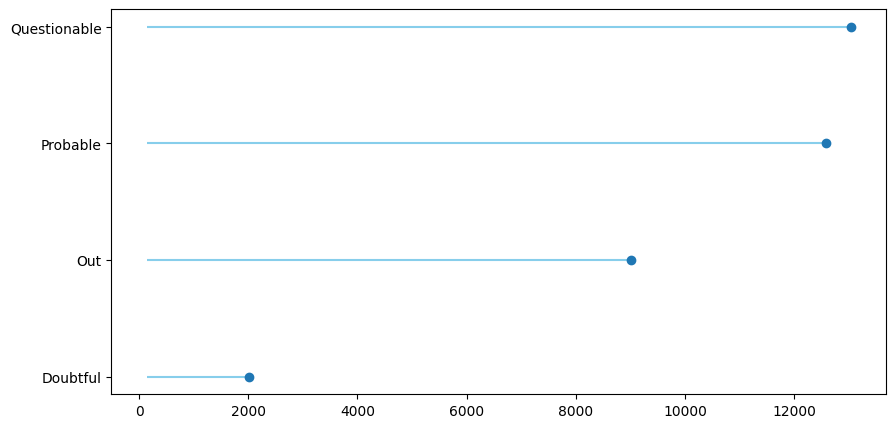

In [86]:
conteo = injuries['report_status'].value_counts(ascending=True)

plt.figure(figsize=(10,5))
plt.hlines(y=conteo.index,
           xmin=140,
           xmax=conteo,
           color='skyblue')
plt.plot(conteo, conteo.index, "o");


In [87]:
#Calculando con un groupby el numero de veces que aparece un jugador en el DF.
# pd.value_counts(injuries['full_name'].str.contains["Julian Edelman"])
injuries[injuries["Player"].str.contains("Julian Edelman")].tail(30)

,Year,Season,Team,Week,Position,Player,report_primary_injury,report_status,practice_primary_injury,practice_status,date_modified
23471,2015.0,REG,NE,16.0,Wide receiver,Julian Edelman,Foot,Doubtful,Foot,Limited Participation in Practice,2015-12-25 12:24:54
23798,2015.0,REG,NE,17.0,Wide receiver,Julian Edelman,Foot,Out,Foot,Did Not Participate In Practice,2016-01-01 13:04:29
24724,2016.0,REG,NE,5.0,Wide receiver,Julian Edelman,Foot,Questionable,Foot,Limited Participation in Practice,2016-10-07 12:40:18
24933,2016.0,REG,NE,6.0,Wide receiver,Julian Edelman,Foot,Questionable,Foot,Limited Participation in Practice,2016-10-14 13:02:23
25117,2016.0,REG,NE,7.0,Wide receiver,Julian Edelman,Foot,Questionable,Foot,Limited Participation in Practice,2016-10-21 12:50:32
25287,2016.0,REG,NE,8.0,Wide receiver,Julian Edelman,Foot,Questionable,Foot,Limited Participation in Practice,2016-10-28 12:06:31
25615,2016.0,REG,NE,10.0,Wide receiver,Julian Edelman,Foot,Questionable,Foot,Limited Participation in Practice,2016-11-11 13:15:12
25776,2016.0,REG,NE,11.0,Wide receiver,Julian Edelman,Foot,Questionable,Foot,Limited Participation in Practice,2016-11-18 12:43:35
25938,2016.0,REG,NE,12.0,Wide receiver,Julian Edelman,Foot,Questionable,Foot,Limited Participation in Practice,2016-11-25 12:48:57
26128,2016.0,REG,NE,13.0,Wide receiver,Julian Edelman,Foot,Questionable,Foot,Limited Participation in Practice,2016-12-02 13:11:41


In [88]:
cross_tab = pd.crosstab(index = injuries.Position, columns=injuries.Week)
cross_tab_matrix = np.array(cross_tab)

In [89]:
cross_tab

Week,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0
Position,,,,,,,,,,,,,,,,,
Center,47,49,58,62,64,60,64,68,70,60,58,71,67,79,61,58,58
Cornerback,198,248,278,286,298,291,280,261,253,241,236,269,272,295,302,270,298
Defense end,126,165,194,183,166,158,160,151,153,166,178,192,182,189,192,178,172
Defensive tackle,109,122,141,138,140,151,139,135,129,146,146,159,171,148,162,174,161
Guard,83,105,139,118,116,134,118,115,120,137,124,156,124,140,149,136,139
Kicker,9,9,14,13,9,13,12,15,10,15,15,15,14,18,19,17,17
Kicker returner,0,0,1,2,1,0,0,0,1,2,1,2,2,1,0,1,0
Linebacker,234,279,331,331,322,340,312,299,298,312,284,332,345,365,358,353,369
Long snapper,6,3,1,7,1,6,5,3,5,2,11,9,9,10,6,10,4


In [90]:
cross_tab.value_counts()

1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  10.0  11.0  12.0  13.0  14.0  15.0  16.0  17.0
0    0    0    0    0    0    0    0    0    0     1     0     0     0     0     0     0       1
111  118  159  149  153  138  148  133  124  138   148   150   156   169   146   142   145     1
222  264  298  285  283  281  273  244  251  273   263   316   310   304   301   320   335     1
198  248  278  286  298  291  280  261  253  241   236   269   272   295   302   270   298     1
131  153  194  197  174  212  198  204  193  188   180   205   214   201   207   220   237     1
126  165  194  183  166  158  160  151  153  166   178   192   182   189   192   178   172     1
121  156  198  214  208  195  176  186  177  183   188   195   231   214   229   201   202     1
120  141  162  155  146  158  143  147  143  154   142   160   178   181   168   158   184     1
109  122  141  138  140  151  139  135  129  146   146   159   171   148   162   174   161     1
0    0    1    2    1    0    0    

In [91]:
# Realizar la prueba chi-cuadrado
estadistico, p_valor, grados_libertad, esperados = chi2_contingency(cross_tab_matrix)

# Mostrar los resultados
print("Estadístico chi-cuadrado:", estadistico)
print("Valor p:", p_valor)
print("Grados de libertad:", grados_libertad)
print("Tabla de frecuencias esperadas:\n", esperados)

Estadístico chi-cuadrado: 198.66355609542148
Valor p: 0.996759673244108
Grados de libertad: 256
Tabla de frecuencias esperadas:
 [[4.49513525e+01 5.35162522e+01 6.43804538e+01 6.33457679e+01
  6.17937391e+01 6.34607330e+01 6.01842277e+01 5.82585624e+01
  5.75687718e+01 5.97243674e+01 5.86896815e+01 6.67084969e+01
  6.76569590e+01 6.90077989e+01 6.86341623e+01 6.67084969e+01
  6.94101767e+01]
 [1.95158813e+02 2.32343805e+02 2.79511344e+02 2.75019197e+02
  2.68280977e+02 2.75518325e+02 2.61293194e+02 2.52932810e+02
  2.49938045e+02 2.59296684e+02 2.54804538e+02 2.89618674e+02
  2.93736475e+02 2.99601222e+02 2.97979058e+02 2.89618674e+02
  3.01348168e+02]
 [1.23893434e+02 1.47499727e+02 1.77443281e+02 1.74591514e+02
  1.70313863e+02 1.74908377e+02 1.65877781e+02 1.60570326e+02
  1.58669148e+02 1.64610329e+02 1.61758562e+02 1.83859757e+02
  1.86473877e+02 1.90197017e+02 1.89167212e+02 1.83859757e+02
  1.91306037e+02]
 [1.05384053e+02 1.25463623e+02 1.50933682e+02 1.48507962e+02
  1.4486938

In [92]:
# Seleccionamos el grado de significancia
alpha = 0.05

# Evaluación de p-valor en función del nivel de significación elegido
if p_valor < alpha:
    print("Rechazar la hipótesis nula: no hay diferencia significativa entre las frecuencias esperadas y las observadas en las tablas de contingencia.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa entre las frecuencias esperadas y las observadas en las tablas de contingencia.")


No se puede rechazar la hipótesis nula: no hay diferencia significativa entre las frecuencias esperadas y las observadas en las tablas de contingencia.


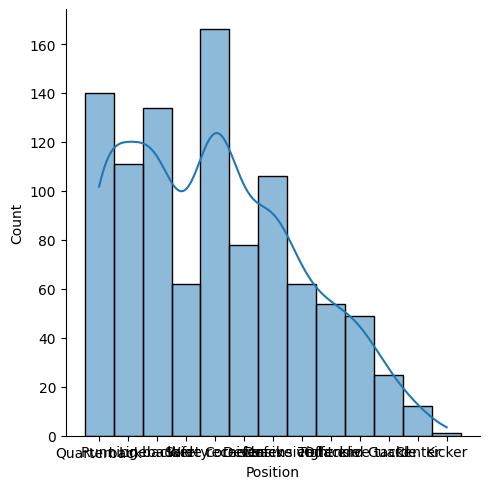

In [93]:
sns.displot(ranks_nfl["Position"], kde=True)

In [ ]:
#Filtro() de todos los repetidos(para comprobar)
injuries.boxplot(ax=)

##### ***3. Fuentes***<a id='4'></a>
- Datasets: injuries: [Libreria NFL]("https://pypi.org/project/nfl-data-py/"), [Wikipedia]("https://en.wikipedia.org/wiki/NFL_Top_100")

## <a href ='#0'> 🔝 To the moon 🔝 </a>